# Notebook 1 - Introduction to Jupyter, exploring/manipulating data with Pandas and plotting with Matplotlib

- Feature engineering: Date

## Introduction to Jupyter notebooks

*Optional*

You can add extended functionalities by installing `conda install -c conda-forge jupyter_contrib_nbextensions`. This will add a tab to your dashboard, from where you can select the extension. By far the most useful in my opinion is the collapsible heading extension in combination with the table of contents extensions, which allow you to get a lot more organized!

For changing the look of the notebook, you want to run `pip install jupyterthemes`. This will allow you to select different themes. For more information visit: https://github.com/dunovank/jupyter-themes

### How to use these notebooks

Do **NOT** just execute all the cells and feel good about it! To learn, open a new notebook and type everything yourself. Use the Jupyter notebook functionalities (see below). Looking at the solution is allowed but **no Copy-Paste**.

If you are not that familiar with Python and the concepts presented here, your goal should be to do replicate the steps in these notebooks with as little peaking as possible. If you are more advanced, try to solve the additional challenges below.


### Basic usage

To start a Jupyter notebook, simply type `jupyter notebook in the command line`. If you do this locally (e.g. on your laptop) this should automatically open up a browser window with the dashboard. We will cover remote usage below.

On the dashboard you can see all files in your current directory. (Note that you can click on any file and edit it.) Jupyter notebook files end in `.ipynb`. To create a new notebook, click on `New` and select a Python version. Now a new tab will appear with your empty notebook.

### Cells

Jupyter notebooks have cells such as this one. There are different types of cells. The two you will use most frequently are code cells and Markdown cells. This here is a Markdown cell, which allows you to write formatted text using Markdown. For a quick Markdown introduction, check out: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

Note that in markdown you can also type Latex:

$x=\frac{a}{b}$

To switch the cell type, either use the toolbar above or press `y` for code and `m` for markdown in command mode, which we will get to now.

### Modes

To navigate Jupyter notebooks there are two modes: Command mode, which you can enter by pressing `esc` and edit mode which you can enter by pressing `Enter`. In edit mode you edit inside a cell, while in command mode you can edit the cells themselves. If you get confused about all the keys just press `h` in command mode, which will bring up a list of all keyboard shortcuts. Of course, you can also use the mouse and the toolbar.

### Executing a cell

To execute a cell, press `Shift + Enter`. This will run the code or render the text and jump to the next cell. If you would like to insert a cell below, type `Alt + Enter`.

Now let's start by actually writing some code.

In [1]:
# Import modules just as you would in a regular Python script
import numpy as np
import matplotlib.pyplot as plt
# This will allow you to display plots inside the notebook.
%matplotlib inline

In [2]:
# Assign variables
a = 10

In [3]:
# The value of the last object in the cell will be displayed
b = 2
a

10

In [4]:
a + b

12

You do not have to work chronologically. You can always edit cells above.

But pay attention: This means that the notebook might throw an error when executed in chronological order after restarting the kernel.

### Get function docs

Next, let's create a basic plot and also note a super-handy functionality of the notebook: When using a function and pressing `Shift + Tab` when the cursor is inside the function parenthesis, it will bring up the list of arguments. Pressing it twice will bring up the doc string.

Similarly, executing `?function_name` will bring up the doc string in a separate window. `??function_name` will bring up the source code.

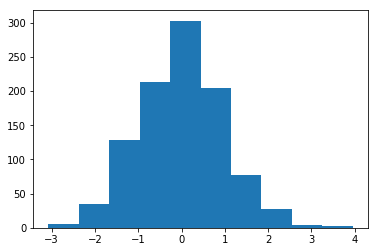

In [5]:
plt.hist(np.random.normal(size=1000))
plt.show()

In [6]:
?plt.hist

In [7]:
??plt.hist

### Sharing a notebook

Here are several ways to share a Jupyter notebook.

**GitHub**

If the notebook is in a GitHub repository (which it probably should be!), GitHub will simply render the notebook for you like this: https://github.com/raspstephan/ESS-Python-Tutorial/blob/master/notebooks/jupyter-intro.ipynb

**NBViewer**

Another option is to copy the GitHub URL to http://nbviewer.jupyter.org/.

**As HTML or PDF**

You can also export the notebook to HTML or PDF by typing `jupyter nbconvert --to FORMAT notebook.ipynb` where `FORMAT` can be `pdf`, `html` or many others.

More information here: https://ipython.org/ipython-doc/3/notebook/nbconvert.html

### Remote setup

Now let's see how we can use Jupyter notebooks remotely.

** Port tunnel**

If you want to run Jupyter on a remote computer, you need to create a port tunnel in order to open the notebook locally in the browser. The command to do this is:

`ssh -L localhost:8888:localhost:8888 user@host`

This will create a tunnel for port 8888. If you do your actual computations on a different node, you can do the same thing to create a tunnel to that node:

`ssh -L localhost:8888:localhost:8888 c-3-39`

Now locally in your browser, go to `localhost:8888`. Most probably it will ask you for a token. You will find the token in the terminal where Jupyter is running, where it will look something like this:

`http://localhost:8888/?token=940f1a436d91bde5ef15e3640dd66bd7d3f724a68513c99f`

Just copy and paste the token after = and you should be good to go.

**Screen**

Since remote connections die sometimes (or all the time), it is really handy to use screen. Screen enables you to run processes remotely, which will continue even after your connection has timed out.

To start a screen session, just type `screen`. To execute screen commands, you need to press `Ctrl + a` followed by a command. `c` will create a new window. `n` and `p` will go to the next and previous window. k will kill the window. Finally, `d` will detach from the window. To log back into a screen session after detaching or having been disconnected, simply type `screen -r`.

Here is more information about screen: http://aperiodic.net/screen/quick_reference

**Mounting**

Finally, to edit remote files in your preferred editor (PyCharm, VSC, etc.), you might want to mount a remote directory. For Linux/Mac you can use sshfs. On the Mac you have to install OSXFuse. Here is a link outlining the process: https://blogs.harvard.edu/acts/2013/11/08/the-newbie-how-to-set-up-sshfs-on-mac-os-x/

Then you can mount a remote directory: `sshfs srasp@gplogin1.ps.uci.edu:/export/home/srasp/ greenplanet_home/`

## Exploring and manipulating data with Pandas plus some basic plotting - Post-processing NWP forecasts

Our first dataset will be a postprocessing dataset. Our aim is to correct biases of NWP temperature forecasts. The forecasts are ensemble means of the ECMWF TIGGE archive. The corresponding observations are taken at DWD surface stations. 

In [8]:
DATADIR = '/local/S.Rasp/ML-Workshop-Data/'

In [9]:
# Command line with !; $to use local variables in command line
!ls $DATADIR

pp_all.csv		  pp_solution.csv  pp_train.csv
pp_sample_submission.csv  pp_test.csv


The first dataset we will use in this workshop is tabular. Tabular data are what you would use in Excel. To work with tabular data in Python, we will use Pandas. Pandas is very widely used which means that you will find an answer to any question you can think of online. Here is a quick overview of basic functionalities: https://pandas.pydata.org/pandas-docs/stable/basics.html

Tabular data files are often saved as `.csv` files which we can easily read into a Pandas `DataFrame`.

There are two datasets: a training and a test datset. Let's open both.

In [10]:
import pandas as pd

In [11]:
!head $f'{DATADIR}pp_test.csv'

,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,u_pl850_fc_mean,v_pl850_fc_mean,q_pl850_fc_mean,cape_fc_mean,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,2016-01-01,44,4.001778,19.397774,44.0,52.9335,8.237,10.133337,10.131109,5481.7905,9.574111,6.202236,0.0020088705,0.46755373,101887.9,24.705662,5775243.0,-1288526.4,1.3415645,3.24927,3298437.0,-10775857.0,275.95218,375.07983
1,2016-01-01,71,0.933522,604.885,759.0,48.2156,8.9784,19.385162,2.524293,5588.5977,6.4594707,-0.5128392,0.0033081102,2.564207,94560.06,78.46961,1349700.0,-227886.42,1.2876378,0.5190509,5560022.0,-6258117.0,273.41055,431.6034
2,2016-01-01,73,-0.18874148,461.4418,340.0,48.6159,13.0506,9.54281,1.230813,5593.8506,7.9442263,-3.3552856,0.0038889486,1.186706,97636.46,98.03016,2487178.5,-1343765.2,0.4998289,0.6577434,6949536.0,-9512730.0,271.99976,361.13397
3,2016-01-01,78,3.95300

In [98]:
# Time how long it takes to read file
%time df_train = pd.read_csv(f'{DATADIR}pp_train.csv', index_col=0)

CPU times: user 4.45 s, sys: 300 ms, total: 4.75 s
Wall time: 4.28 s


In [99]:
%time df_test = pd.read_csv(f'{DATADIR}pp_test.csv', index_col=0)

CPU times: user 1.88 s, sys: 44 ms, total: 1.92 s
Wall time: 850 ms


### Training, test and validation sets
The first thing you will notice is that the test set does not have the `t2m_obs` column. So what are these different datasets?

- Training set: Data used to optimize the machine learning algorithm
- Validation set: Data used to independently verify the skill of the algorithm
- Test set: Another independent set used for final verification. In this case the solutions are hidden (I have them, hehe)

In [14]:
# Show the first few lines. .tail() shows last few lines
df_train.head()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [15]:
df_test.head()

,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,2016-01-01,44,4.001778,19.397774,44.0,52.9335,8.2370,10.133337,10.131109,5481.7905,...,101887.90,24.705662,5775243.0,-1288526.40,1.341565,3.249270,3298437.0,-10775857.0,275.95218,375.07983
1,2016-01-01,71,0.933522,604.885000,759.0,48.2156,8.9784,19.385162,2.524293,5588.5977,...,94560.06,78.469610,1349700.0,-227886.42,1.287638,0.519051,5560022.0,-6258117.0,273.41055,431.60340
2,2016-01-01,73,-0.188741,461.441800,340.0,48.6159,13.0506,9.542810,1.230813,5593.8506,...,97636.46,98.030160,2487178.5,-1343765.20,0.499829,0.657743,6949536.0,-9512730.0,271.99976,361.13397
3,2016-01-01,78,3.953006,47.632523,65.0,52.4853,7.9126,10.977405,9.408463,5488.8840,...,101561.08,20.500540,5856912.0,-1207934.40,1.439010,3.148981,3502853.8,-10732310.0,275.77515,245.30484
4,2016-01-01,91,1.293405,348.869900,300.0,50.7446,9.3450,14.657755,8.755051,5538.4110,...,97486.05,83.718890,1802866.2,-874888.00,0.996717,1.799243,2939294.0,-6318281.0,274.60370,378.45820


In [16]:
# Check how many rows in dataset
len(df_train), len(df_test)

(980562, 182218)

In [17]:
# Check how many individual stations there are
df_train.station.nunique(), df_test['station'].nunique()

(537, 502)

In [18]:
df_train.time.min(), df_train.time.max()

('2011-01-01', '2015-12-31')

In [19]:
df_test.time.min(), df_test.time.max()

('2016-01-01', '2016-12-31')

### Some basic plotting

Our aim is to correct the `t2m_fc_mean` forecasts by learning from the corresponding observations in the training dataset. Let's visualize the data a little. For this we can use `seaborn` which is a wrapper around Matplotlib and specializes in visualizing tabular data.

In [20]:
import seaborn as sns

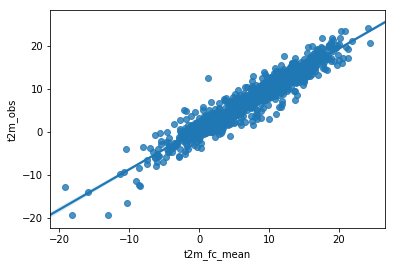

In [21]:
# Plot every 1000th datapoint with a linear regression
sns.regplot(x='t2m_fc_mean', y='t2m_obs', data=df_train[::1000])

### Clean the dataset

We will now prepare the datasets as input for our machine learning models. First, let's check if there are missing values.

In [28]:
type(df_train['station'])

pandas.core.series.Series

In [29]:
df_train.apply(pd.Series.isna).mean()

t2m_obs             0.073126
time                0.000000
station             0.000000
t2m_fc_mean         0.000000
orog                0.000000
station_alt         0.000000
station_lat         0.000000
station_lon         0.000000
u_pl500_fc_mean     0.000000
v_pl500_fc_mean     0.000000
gh_pl500_fc_mean    0.000000
u_pl850_fc_mean     0.000000
v_pl850_fc_mean     0.000000
q_pl850_fc_mean     0.000000
cape_fc_mean        0.000000
sp_fc_mean          0.000000
tcc_fc_mean         0.000000
sshf_fc_mean        0.000000
slhf_fc_mean        0.000000
u10_fc_mean         0.000000
v10_fc_mean         0.000000
ssr_fc_mean         0.000000
str_fc_mean         0.000000
d2m_fc_mean         0.000000
sm_fc_mean          0.095825
dtype: float64

So we see that we have some observation data missing. These we should remove. And there are also some values missing for `sm_fc_mean`. We don't want to throw away the entire row, so instead we will set these to the mean value.

In [100]:
# Before we make any permanent changes to the dataset, let's create a copy
df_copy = df_train.copy()

In [101]:
# Drop rows where observations are missing
df_train.dropna(subset=['t2m_obs'], inplace=True)

In [102]:
# Replace missing sm_fc_mean values with the column mean
df_train['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

In [103]:
# Split features and targets
# At the moment we only want continuous variables in the data set
# so we will throw away the station ID, along with the time
X_train = df_train.drop(['t2m_obs', 'time', 'station'], axis=1)
y_train = df_train['t2m_obs']

### Normalize data

Some machine learning algorithms require the features to be approximately on the same order of magnitude (we will learn later why). One standard way of doing this is to subtract the mean and divide by zero.

In [104]:
X_train.head()

,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,u_pl850_fc_mean,v_pl850_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,5619.5130,5.040613,-2.424095,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,5579.0920,16.777810,-6.120173,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,5614.9375,0.836513,-0.267559,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,5588.1655,6.178990,-1.342263,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,5588.1724,14.216161,-5.213433,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [105]:
X_train = (X_train - X_train.mean()) / X_train.std()

In [106]:
X_train.head()

,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,u_pl850_fc_mean,v_pl850_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,-1.085537,-0.806304,-0.319616,-0.014388,-1.988359,-0.375583,-0.420998,0.082273,0.032273,-0.589303,...,1.153825,1.165866,0.571970,1.383392,0.551740,0.058768,-1.371728,1.699146,-0.637595,0.524749
1,-0.772045,-1.182264,-0.890327,1.113170,-0.962599,0.520713,-0.916043,-0.189695,1.584633,-1.304124,...,1.271600,1.187512,0.800075,1.439388,2.107265,0.081871,-1.372214,2.224538,-0.412719,0.764039
2,-2.064770,1.317913,1.692322,-1.360192,-0.607706,-0.792744,-0.547005,0.051487,-0.523761,-0.172229,...,-1.328921,0.962162,0.083173,1.336190,-0.456843,-0.807191,-1.217983,1.431614,-1.860869,1.593406
3,-1.836220,0.705375,0.178854,-1.150334,1.341568,-0.585835,-0.892244,-0.128645,0.182835,-0.380077,...,-0.279698,0.947549,0.432299,1.280152,0.441155,-0.154016,-1.108971,0.776981,-1.555712,0.385818
4,-0.823013,-1.061694,-0.814473,0.878201,-1.117882,0.257640,-0.803640,-0.128599,1.245830,-1.128760,...,1.168232,1.201311,0.762755,1.480936,1.428789,0.017412,-1.373112,2.175315,-0.488854,-1.374796


### Preprocessing in one function

In [107]:
't2m_obs' in df_test.columns

False

In [119]:
def preproc(df, means=None, stds=None):
    if 't2m_obs' in df.columns: df.dropna(subset=['t2m_obs'], inplace=True)
    df['sm_fc_mean'].replace(np.nan, df['sm_fc_mean'].mean(), inplace=True)
    
    y = df.pop('t2m_obs') if 't2m_obs' in df.columns else None
    X = df.drop(['time', 'station'], 1)
    
    if means is None: means = X.mean()
    if stds  is None: stds  = X.std()
    
    X = (X - means) / stds
    return X, y, means, stds

In [120]:
df_train = df_copy

### Split training data into a train and validation set

- Features/inputs: X
- Targets/outputs: y

In [121]:
split_date = '2015-01-01'

In [126]:
df_train = df_copy[df_copy.time < split_date]
df_valid = df_copy[df_copy.time >= split_date]

It's important to use the same means and stds for each of the datasets

In [127]:
pd.options.mode.chained_assignment = None

In [128]:
X_train, y_train, means, stds = preproc(df_train)

In [129]:
X_valid, y_valid, _, _ = preproc(df_valid, means, stds)

In [130]:
X_test, _, _, _ = preproc(df_test, means, stds)

In [72]:
X_train.shape, X_valid.shape, X_test.shape

((784557, 22), (196005, 22), (182218, 22))

### Save preprocessed datasets

Let's save these datasets so we can load them in a different notebook. The easiest way to save Python objects is Pickle.

In [74]:
import pickle

In [77]:
!mkdir -p ./data
with open('./data/preproc_data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_valid, y_valid, X_test), f)

In [78]:
# To load
with open('./data/preproc_data.pkl', 'rb') as f:
    X_train, y_train, X_valid, y_valid, X_test = pickle.load(f)

## Your turn



### Check out mean bias

In [131]:
df = df_copy.copy()

In [132]:
df.dropna(subset=['t2m_obs'], inplace=True)
df['sm_fc_mean'].replace(np.nan, df['sm_fc_mean'].mean(), inplace=True)

In [133]:
df.head()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [134]:
df['error'] = df['t2m_fc_mean'] - df['t2m_obs']

In [135]:
df.error.mean()

-0.25204668264974084

In [136]:
# Mean absolute error
df.error.abs().mean(), np.mean(np.abs(df.error))

(1.5092281842958304, 1.5092281842958304)

### Which variable is the best predictor for the forecast error?

In [138]:
df.shape

(908857, 26)

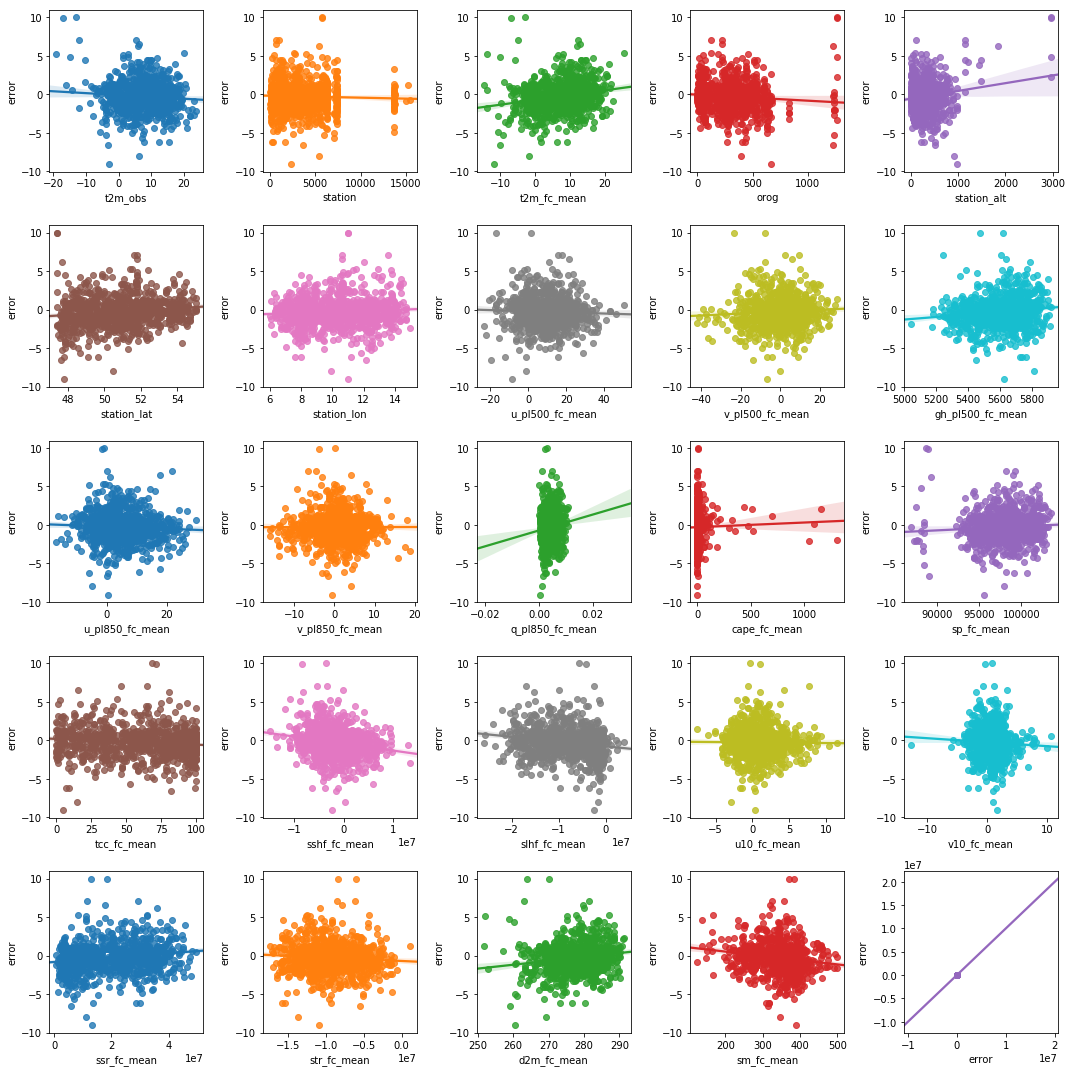

In [143]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for ax, c in zip(axs.flat, df.columns.drop('time')):
    sns.regplot(x=c, y='error', data=df[::1000], ax=ax)
plt.tight_layout()

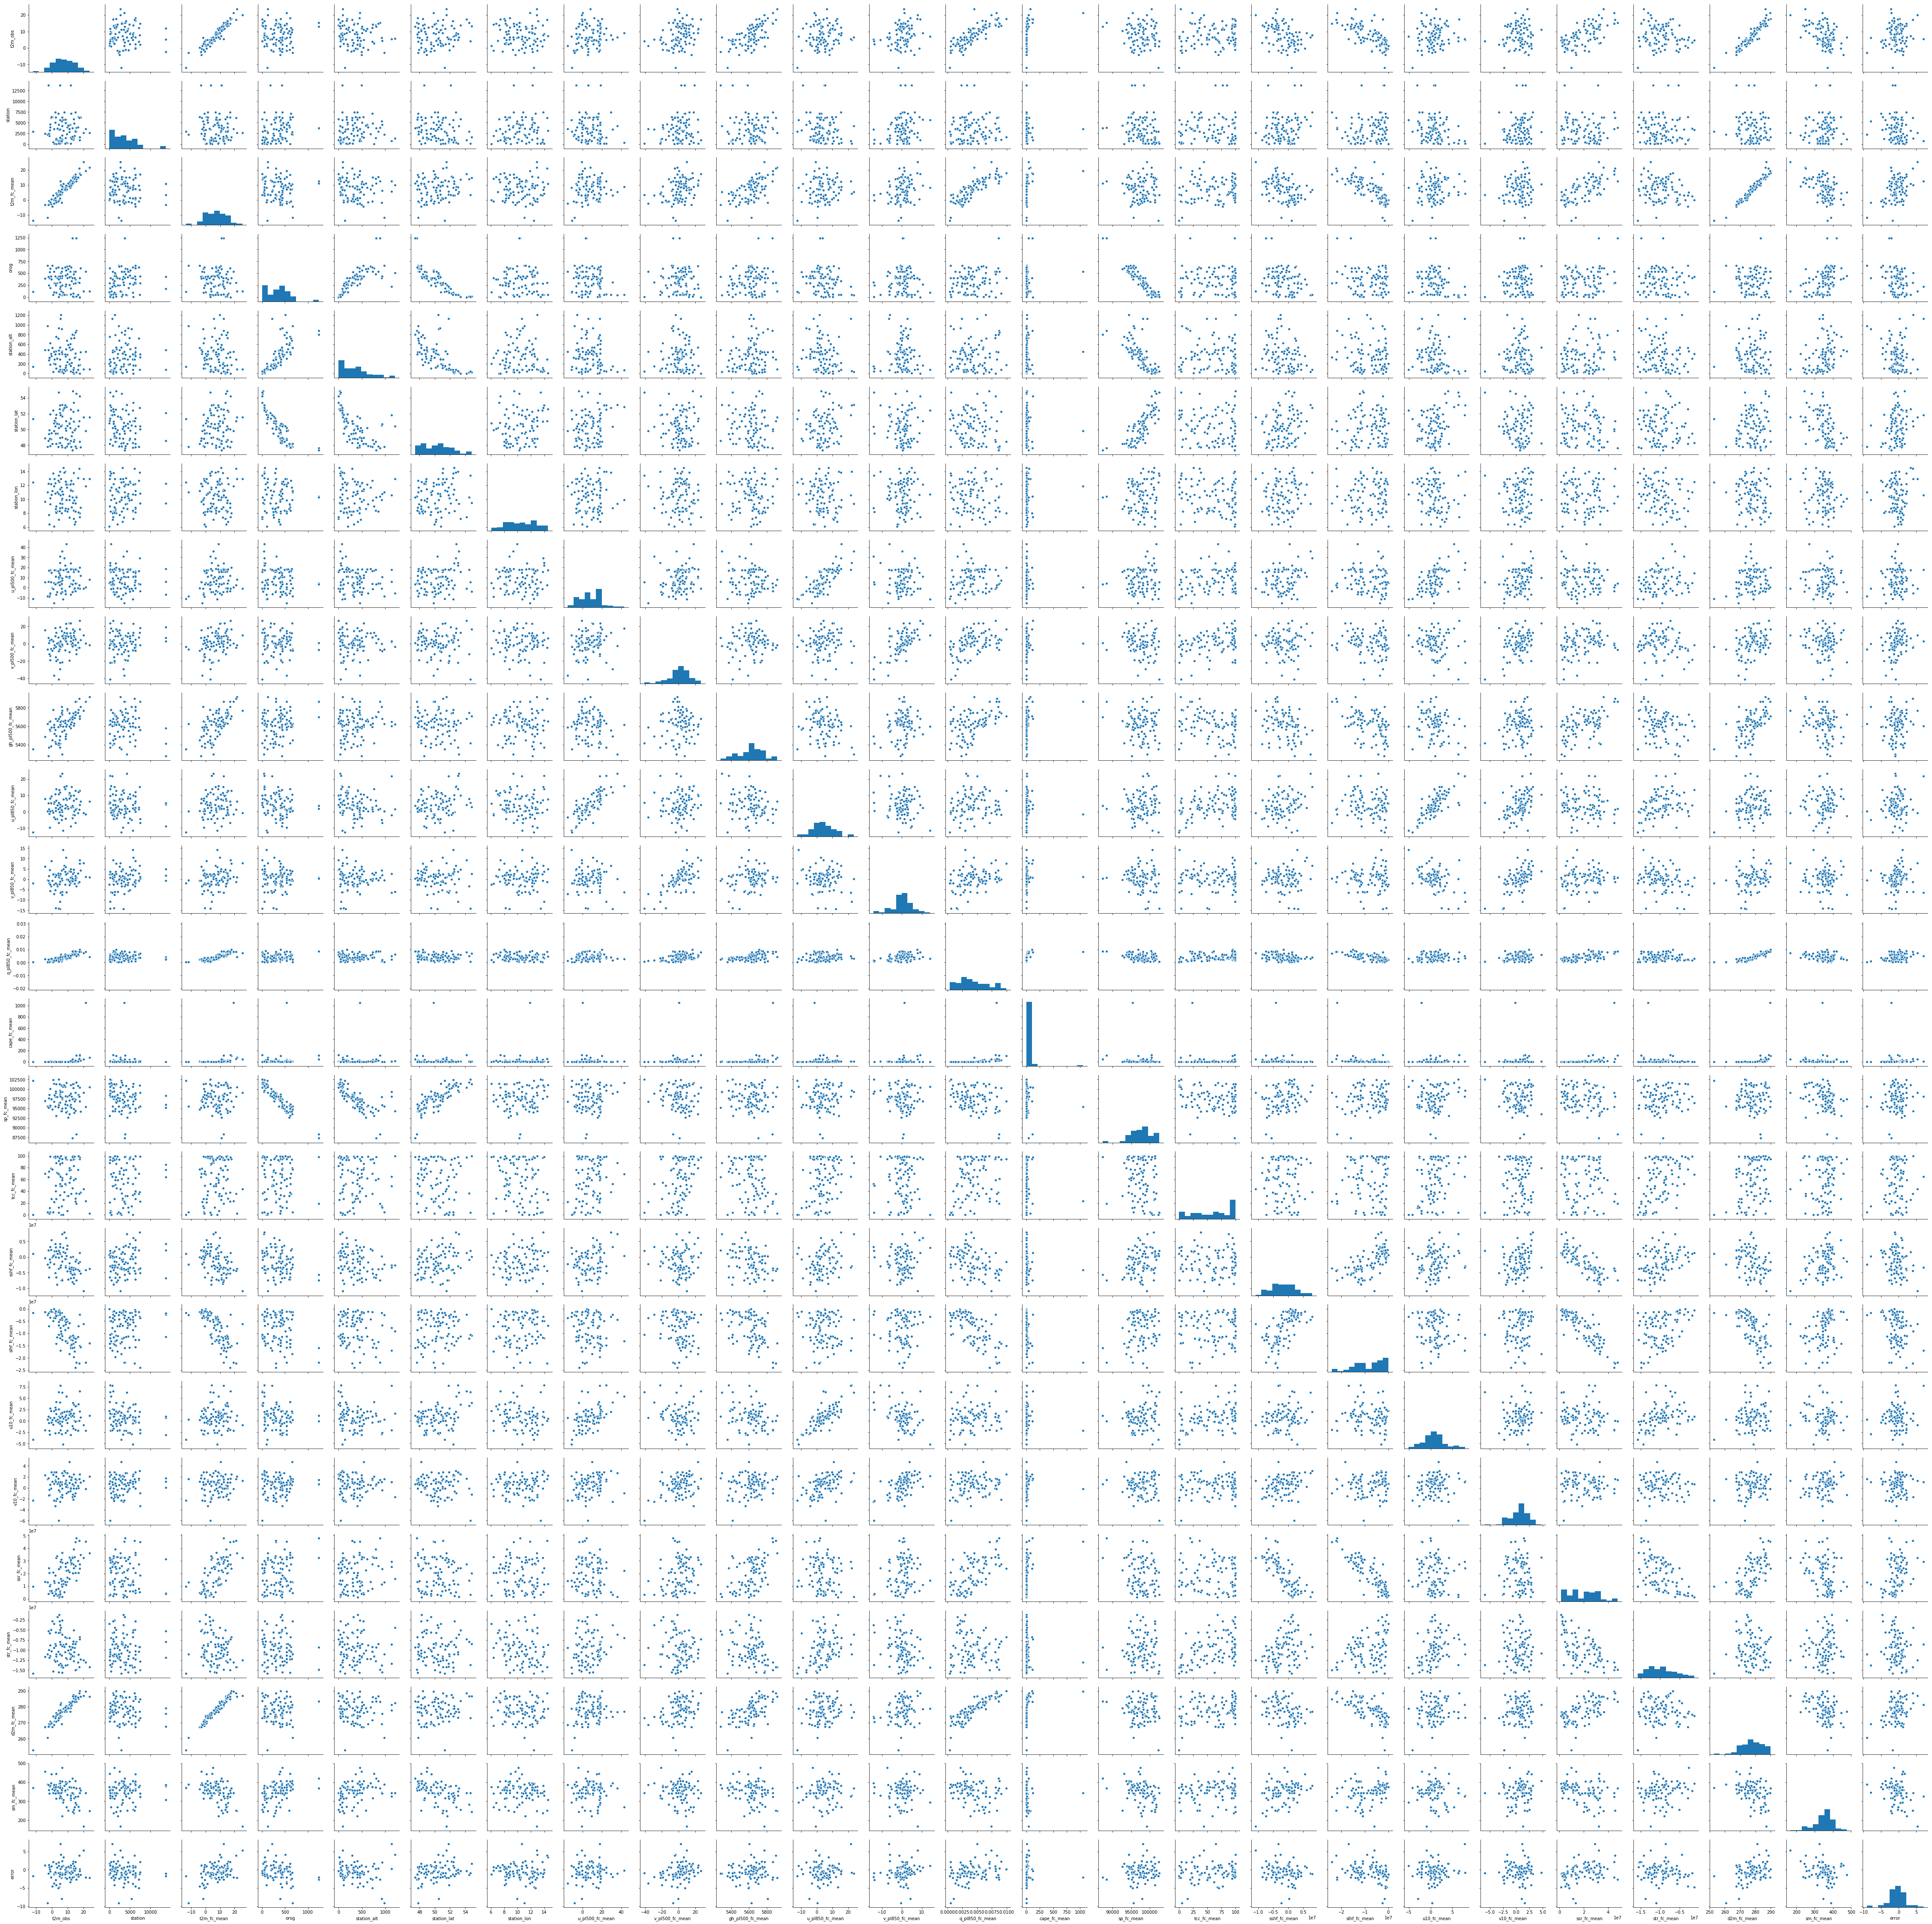

In [137]:
sns.pairplot(df[::10000])

### Plot station locations on map with cartopy

In [173]:
# Get unique stations lats and lons
stats = list(np.unique(df.station))
lats = [df.station_lat[df.station == s].iloc[0] for s in stats]
lons = [df.station_lon[df.station == s].iloc[0] for s in stats]
alts = [df.station_alt[df.station == s].iloc[0] for s in stats]

In [169]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

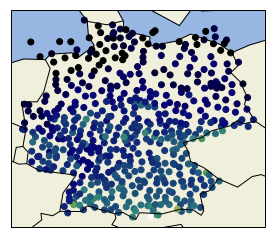

In [177]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(lons, lats, c=alts, cmap='gist_earth')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAKES, alpha=0.5)
